In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [2]:
from computations.insights.opinions import varying_parameters
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution
from computations.insights.opinions import mse_seeking_uncertainty

In [3]:
sigma = 0.2
information_source = (0.6, 0.3)
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=sigma)
belief_distribution = BeliefDistribution(unique, unique, linespace)
network = ArtificialNetwork(1000, "random_graph", p=0.005)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

In [4]:
tolerance = sigma * 6
update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0, rewire_probability=1, tolerance=tolerance)
interactions = Interactions(update_rule, interaction_rate=0.8, interacting_agents=True, information_source=information_source, draw_from_source=True)
insights = Insights(["mse"])
simulation = Simulation(1000, insights)

In [5]:
initial_uncertainties = np.arange(0.1, 0.25, 0.0125).round(2)
rewire_probabilities = np.arange(0.05, 1, 0.05).round(2)
results = mse_seeking_uncertainty(rewire_probabilities, initial_uncertainties, agent_network, simulation, interactions)

0 of 19|0 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 100.62it/s]
0 of 19|1 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 100.65it/s]
0 of 19|2 of 12: 100%|██████████| 1000/1000 [00:10<00:00, 96.05it/s]
0 of 19|3 of 12: 100%|██████████| 1000/1000 [00:10<00:00, 95.63it/s]
0 of 19|4 of 12: 100%|██████████| 1000/1000 [00:10<00:00, 98.03it/s]
0 of 19|5 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 101.43it/s]
0 of 19|6 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 102.33it/s]
0 of 19|7 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 103.48it/s]
0 of 19|8 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 105.26it/s]
0 of 19|9 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 103.40it/s]
0 of 19|10 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 100.60it/s]
0 of 19|11 of 12: 100%|██████████| 1000/1000 [00:10<00:00, 97.93it/s]
1 of 19|0 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 100.89it/s]
1 of 19|1 of 12: 100%|██████████| 1000/1000 [00:09<00:00, 100.83it/s]
1 of 19|2 of 12: 100%|

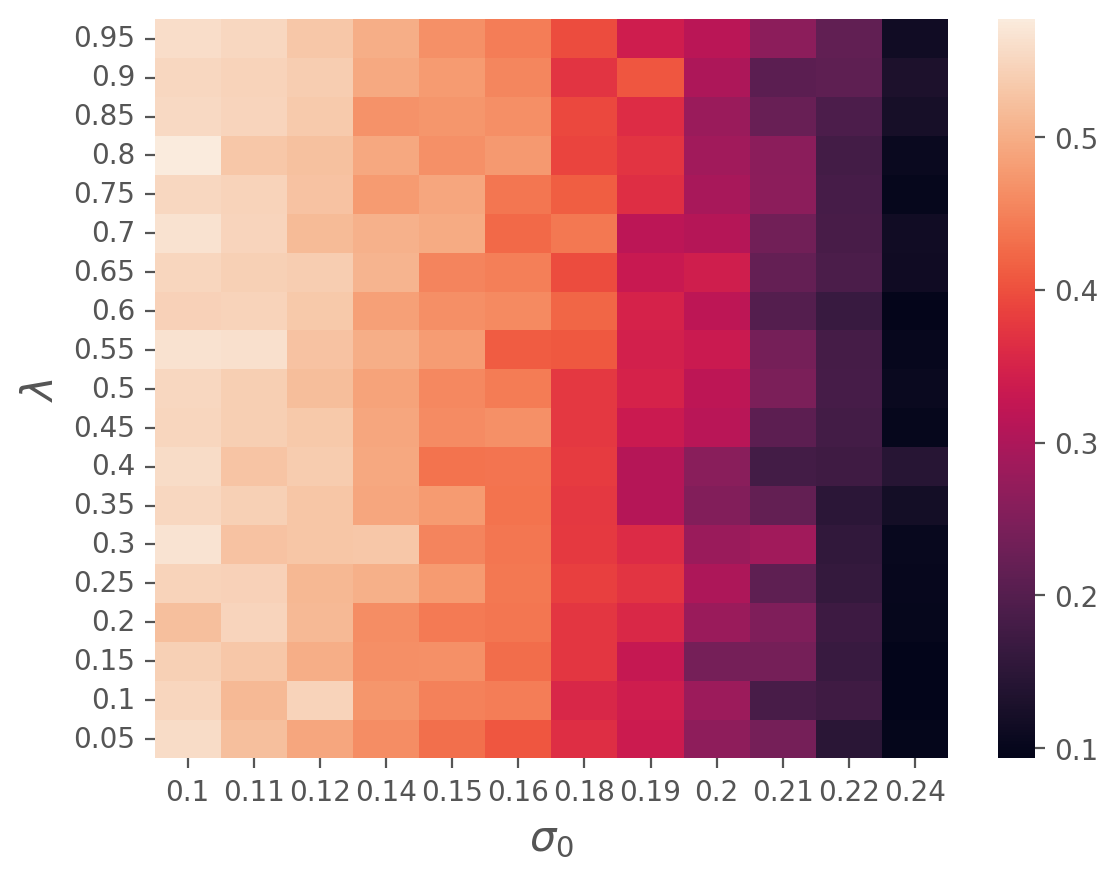

In [6]:
plot_number_mse_assimilation_uncertainty(results, rewire_probabilities, initial_uncertainties)